In previous week we find out how to work with tensorflow API (Keras) to learn a linear connection between x and y in this week we aim to learn a fashion dataset called Mnist.

This dataset contains 70k photo of clothes and shoes which is contains:

- 28*28 photos
- 10 classes
- grayscale photo

First we need to load mnist datasets from keras library

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.5.0


In [2]:
mnist = keras.datasets.fashion_mnist
(train_photo, train_label), (test_photo, test_label) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In following cells we are going to Plot one the images using matplotlib library to do this tasks.

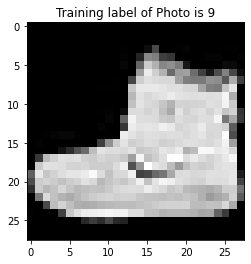

The Input shape : (28, 28)


In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_photo[0], cmap='gray')
plt.title(f'Training label of Photo is {train_label[0]}')
plt.show()

print(f'The Input shape : {train_photo[0].shape}')

Before Start to creating our model it's better to normalizing our data since the neural network has better performance on normalized data.

In [4]:
train_photo = train_photo / 255.0
test_photo = test_photo / 255.0

Now we demonstrate how the input is and how many classes we have. now it's the time create our model and tweaking some feature to enhance our performance.
The things is important is about our first and end layer.

* The First Layer should always has the input shape as same as our data shape which is (28, 28) and the End layer should be similar to our number of classes, equal to 10. 

* the relu activation function is when X>0 return X, else return 0 

* the softmax is good for multiple classes which is return a vector with probabilities of each classes and then return the biggest number in that vector as the prediction.

In [5]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(units=128, activation=tf.nn.relu),
                          keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

Then We compile our model with Adam optimizer and specific loss and metrics accuracy and fit to our train 

In [6]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_photo, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5009 - accuracy: 0.8229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8907


For evaluating our model we need to feed our model the unseen data to calculating model performance.

In [7]:
model.evaluate(test_photo, test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.3586 - accuracy: 0.8714


[0.3585750162601471, 0.871399998664856]

In [8]:
classification = model.predict(test_photo)
np.printoptions(linewidth = 5)
print('Probabilities : \n',classification[0])
print('Class:', test_label[0])

Probabilities : 
 [1.17578065e-05 2.26791439e-08 5.77636321e-08 3.05945602e-10
 5.02310456e-07 1.58469018e-03 3.82534563e-06 5.10904100e-03
 9.97621737e-06 9.93280113e-01]
Class: 9


There are several things we could do to imporove accuracy of systems:

*   Increase number of neuron in Hidden layer
*   Increase number of epochs



In [9]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(units=512, activation=tf.nn.relu),
                          keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_photo, train_label, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4743 - accuracy: 0.8317
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3585 - accuracy: 0.8687
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3219 - accuracy: 0.8819
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2997 - accuracy: 0.8894
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2817 - accuracy: 0.8960
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2650 - accuracy: 0.9004
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2518 - accuracy: 0.9048
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2419 - accuracy: 0.9094
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2303 - accuracy: 0.9144
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.223

In [10]:
model.evaluate(test_photo, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.8901


[0.3512868583202362, 0.8901000022888184]

Sometimes we need to control our training with callback classes.

In [11]:
class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss')<0.4:
            print('The model reach 60% accuract so the training stop.')
            self.model.stop_training = True

In [12]:
callbacks = MyCallBack()
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(units=512, activation=tf.nn.relu),
                          keras.layers.Dense(units=10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_photo, train_label, epochs = 10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4755 - accuracy: 0.8326
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3575 - accuracy: 0.8698
The model reach 60% accuract so the training stop.
